# HW2: Linear and Logistic Regressions
## BUS 20800: Big Data
## Due: Jan 22nd, 2024 before class

**Collaboration**: Dario did most of Problem 1, Shivani did Problem 2 and EDA.py except for the heatmap which was done by Monica. Monica did the data cleaning function and part of the assignment. Albertyo did Problem 3 and the logistic regression file. Overall, we worked together in a reg room and helped each other on our respective parts. 

______

## Problem 1: Logistic Loss



1.1 Recall from the lecture, in linear regression setting, we have:
$$
Minimize \ squared \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$
    
As for the logistic regression, we also have a loss similar to the squared loss, namely logistic loss, defined as:
$$
    L = \sum_{i = 1}^{N} [log(1+e^{x_i^T \beta}) - y_ix_i^T \beta]
$$
    
Show that the following equivalence relationship for logistic regression holds.

$$
Minimize \ logistic \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$

**Answer**: 
Let $\hat{\beta}$ be the parameter vector that maximizes the likelihood $L(\beta|data)$ and let $\widetilde{\beta}$ be an arbitrary vector. Then:

$$
\hat{\beta} = \underset{\beta}{\mathrm{max}} \ L(\beta|data) \\
\iff L(\hat{\beta}|data) ≥ L(\widetilde{\beta}|data)
$$

Since $log$ is a monotonic function we have that:

$$
L(\hat{\beta}|data) \geq L(\widetilde{\beta}|data) \\
\iff \log L(\hat{\beta}|data) \geq \log L(\widetilde{\beta}|data)
$$

And after multiplying by a negative constant:

$$
\log L(\hat{\beta}|data) \geq \log L(\widetilde{\beta}|data) \\
\iff -2\log L(\hat{\beta}|data) \leq -2\log L(\widetilde{\beta}|data)
$$

Using that $Dev(\beta) = -2\log L(\beta|data) + C$ where $C$ is a constant, we get that for any arbitrary vector $\widetilde{\beta}$:

$$
-2\log L(\hat{\beta}|data) \leq -2\log L(\widetilde{\beta}|data) \\
\iff \text{Dev}(\hat{\beta}) \leq \text{Dev}(\widetilde{\beta}) \\
\iff \hat{\beta} = \underset{\beta}{\mathrm{min}} \ \text{Dev}(\beta)
$$

Therefore, maximizing likelihood is equivalent to minimizing the deviance.

We will then proceed by computing $\log L(\beta|data)$.

$$
\begin{align*}
\log L(\beta|data) &= \log \left( \prod_{i=1}^{n} P(y_i|x_i) \right) \\
&= \log \left( \prod_{i=1}^{n} p_i^{y_i} (1-p_i)^{(1-y_i)} \right) \\
&= \sum_{i=1}^{n} \left[ y_i \log p_i + (1-y_i) \log (1-p_i) \right] \\
&= \sum_{i=1}^{n} \left[ y_i \log \left( \frac{e^{x_i'\beta}}{1 + e^{x_i'\beta}} \right) + (1-y_i) \log \left( \frac{1}{1 + e^{x_i'\beta}} \right) \right] \\
&= \sum_{i=1}^{n} [y_i \log(e^{x_i'\beta}) - y_i \log(1 + e^{x_i'\beta}) - (1 - y_i) \log(1 + e^{x_i'\beta})] \\
&= \sum_{i=1}^{n} [y_i x_i'\beta + \log(1 + e^{x_i'\beta}) (- y_i - (1 - y_i)) ] \\
&= \sum_{i=1}^{n} [y_i x_i'\beta - \log(1 + e^{x_i'\beta}) ]
\end{align*}
$$

Therefore:

$$
\begin{align*}
\text{Dev}(\beta) &= -2\log L(\beta|data) + C \\
&= -2\sum_{i=1}^{n} [y_i x_i'\beta - \log(1 + e^{x_i'\beta}) ] + C \\
&= 2\sum_{i=1}^{n} [\log(1 + e^{x_i'\beta}) - y_i x_i'\beta] + C \\
&= 2 \ \text{LogisticLoss}(\beta) + C
\end{align*} 
$$

Then:

$$
\text{LogisticLoss}(\beta) = \frac{1}{2}(\text{Dev}(\beta) - C)
$$

Therefore, it is clear that $\hat{\beta}$ minimizes $\text{Dev}(\beta)$ if and only if it also minimizes $\text{LogisticLoss}(\beta)$.

In conclusion:

$$
\hat{\beta} = \underset{\beta}{\mathrm{max}} \ L(\beta|data) = \underset{\beta}{\mathrm{min}} \ \text{Dev}(\beta) =
\underset{\beta}{\mathrm{min}} \ \text{LogisticLoss}(\beta)
$$

1.2 Calcuate the derivative of the log likelihood with respect to weight $\beta$. Hint: Apply the equivalence you proved in 1.1.

**Answer**:
From 1.1 we know that $\log L(\beta|data) = \sum_{i=1}^{n} [y_i x_i'\beta - \log(1 + e^{x_i'\beta}) ]$. Now, we proceed by taking its partial derivative with respect to $\beta_j$.

$$
\begin{align*}
\frac{\partial L(\beta)}{\partial \beta_j} &=
\frac{\partial}{\partial \beta_j} \sum_{i=1}^{n}  \left[ y_i x_i'\beta - \log(1 + e^{x_i'\beta}) \right] \\
&= \frac{\partial}{\partial \beta_j} \sum_{i=1}^{n} \left[ y_i (\beta_0+...+\beta_j x_{ij} + ... + \beta_k x_{ik})
- \log(1 + e^{\beta_0+...+\beta_j x_{ij} + ... + \beta_k x_{ik}}) \right] \\
&= \sum_{i=1}^{n} \left( y_ix_{ij} - \frac{1}{1 + e^{\beta_0+...+\beta_j x_{ij} + ... + \beta_k x_{ik}}}
(x_{ij} e^{\beta_0+...+\beta_j x_{ij} + ... + \beta_k x_{ik}}) \right) \\
&= \sum_{i=1}^{n} \left( y_ix_{ij} - \frac{1}{1 + e^{x_i'\beta}}(x_{ij} e^{x_i'\beta}) \right) \\
&= \sum_{i=1}^{n} \left( y_i - \frac{e^{x_i'\beta}} {1 + e^{x_i'\beta}} \right) x_{ij} \\
&= \sum_{i=1}^{n} \left( y_i - p_i \right) x_{ij}
\end{align*} 
$$

Repeating this for every parameter in $\beta$ we can derive the gradient, where $X$ is the predictor matrix, $Y$ the outcome vector, and $P$ the predicted probabilities vector:

$$
\nabla L(\beta) = X' (Y - P)
$$

______

1.3  Run the following code, and show that when data are perfectly separated, the deviance minimization has no solution.

- First, run the following simulation codes, and you should get an error called `PerfectSeparationError`;

- Next, recall the definition of deviance and perfect separation on page 30 and 38 in the Week2 lecture slides. Use the formulas on the slides to prove this result.

Hint: Consider all scalar values of $\lambda = x_i'b$, where $b$ is a potential parameter value that can perfectly separate the data. Treat deviance as a function of $\lambda$; take the derivative of deviance with respect to $\lambda$, then check how the gradient behaves when we vary the values of $\lambda$?


In [1]:
!pip install wordcloud
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


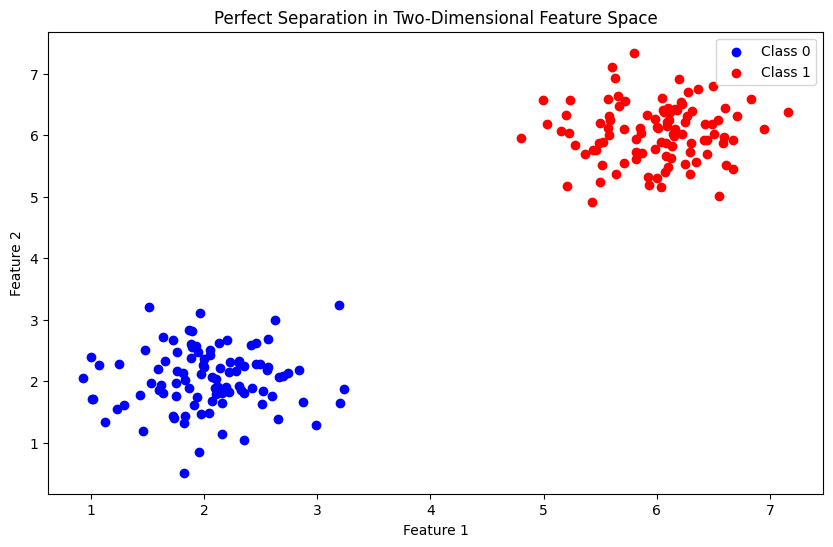

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)  # Setting the random seed for reproducibility
# Generating a two-dimensional feature space for perfect separation
# Class 0 data
x0_1 = np.random.normal(2, 0.5, 100)  # Feature 1 for Class 0
x0_2 = np.random.normal(2, 0.5, 100)  # Feature 2 for Class 0
# Class 1 data
x1_1 = np.random.normal(6, 0.5, 100)  # Feature 1 for Class 1
x1_2 = np.random.normal(6, 0.5, 100)  # Feature 2 for Class 1
# Plotting in the feature space
plt.figure(figsize=(10, 6))
plt.scatter(x0_1, x0_2, color='blue', label='Class 0')
plt.scatter(x1_1, x1_2, color='red', label='Class 1')
# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perfect Separation in Two-Dimensional Feature Space')
plt.legend()
# Display the plot
plt.show()

In [3]:
import statsmodels.api as sm

# Combine the data into a single array
X = np.vstack((np.column_stack((x0_1, x0_2)), np.column_stack((x1_1, x1_2))))
# Target variable with class labels
y = np.array([0] * 100 + [1] * 100)  

# Adding a constant for the intercept
X = sm.add_constant(X)

logit = sm.GLM(y, X, family=sm.families.Binomial())
result = logit.fit()

/home/shivanipuli/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/shivanipuli/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/shivanipuli/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


**Answer**:
1.3
Let's suppose that $b$ is a potential parameter value that can perfectly separate the data. Now, we will consider all candidate parameter values in the form of $\lambda b$ and find their deviance:

$$
\begin{align*}
\text{Dev}(\lambda b) &= -2\log L(\lambda b) + C \\
&= -2\sum_{i=1}^{n} \left( y_i x_i'(\lambda b) - \log(1 + e^{x_i'(\lambda b)}) \right) + C \\
&= -2\sum_{i=1}^{n} \left( \lambda y_i x_i'b - \log(1 + e^{\lambda x_i'b}) \right) + C \\
\end{align*}
$$

Now, we will find its derivative with respect to $\lambda$:

$$
\begin{align*}
\frac {d \ \text{Dev}(\lambda b)}{d \lambda } &= \frac {d}{d \lambda }
\left( -2\sum_{i=1}^{n} \left( \lambda y_i x_i'b - \log(1 + e^{\lambda x_i'b}) \right) + C \right)\\
&= -2\sum_{i=1}^{n} \frac {d}{d \lambda } \left( \lambda y_i x_i'b - \log(1 + e^{\lambda x_i'b}) \right) \\
&= -2\sum_{i=1}^{n} \left( y_i x_i'b - \frac{1}{1 + e^{\lambda x_i'b}}(x_i'b e^{\lambda x_i'b}) \right) \\
&= -2\sum_{i=1}^{n} \left( y_i - \frac{e^{\lambda x_i'b}}{1 + e^{\lambda x_i'b}} \right) x_i'b \\
&= -2\sum_{i=1}^{n} \left( y_i - \frac{e^{x_i'(\lambda b)}}{1 + e^{x_i'(\lambda b)}} \right) x_i'b \\
&= -2\sum_{i=1}^{n} \left( y_i - p_i \right) x_i'b \\
\end{align*}
$$

Now, we will focus on the sign of every term $\left( y_i - p_i \right) x_i'b$ of the summation.

For all $i$ such that $y_i = 1$ the term reduces to $\left(1 - p_i \right) x_i'b$, and perfect separation implies $x_i' b >0$, so the term is clearly positive.

For all $i$ such that $y_i = 0$ the term reduces to $(- p_i)x_i'b$, and perfect separation implies $x_i' b < 0$, so the term is the product of two negative numbers, which is positive.

Therefore, every term in the summation has to be positive, so $\sum_{i=1}^{n} \left( y_i - p_i \right) x_i'b > 0$ and $\frac {d \ \text{Dev}(\lambda b)}{d \lambda } < 0$.

This last inequality implies that the gradient of $\text{Dev}(\lambda b)$ decreases as $\lambda$ increases. However, this prevents us from finding a solution that minimizes deviance because it can become infinitely small as $\lambda$ grows unbounded.

## Problem 2: Default Prediction

### Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub used to be the world's largest peer-to-peer lending platform before it closed this business.


The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
* **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

 1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
 2. Current: Applicant is in the process of paying the instalments. These candidates are not labelled as 'defaulted'.
 3. Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan


* **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transnational history of those applicants with the company and so this data is not available with the company (and thus not in this dataset)


In this exercise, you will work as a group of data scientists for LendingClub to find out the driving factors behind loan default. And use these variables to identify risky loan applicants.

We will mainly focus on the binary classification case for simplicity, 'Fully Paid' and 'Charged Off'. 

And for each variable, you can see its description in Variable_description.pdf.


In [4]:
# Set up codes
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.2)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons, make_circles, make_blobs

In [5]:
# Load training data
_DATA_DIR = './Data'
loan_data = pd.read_csv('%s/loan_train.csv'%(_DATA_DIR), index_col =0)
loan_data.reset_index(inplace = True)

In [6]:
loan_data.head()

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
0,176062,5525.0,36 months,15.61%,193.19,D,D1,NaN,NaN,OWN,...,6.0,1.0,3779.0,72.7%,13.0,f,Individual,0.0,1.0,Charged Off
1,118664,40000.0,36 months,6.67%,1229.06,A,A2,land surveryor,5 years,OWN,...,18.0,0.0,13573.0,15.1%,36.0,w,Individual,0.0,0.0,Fully Paid
2,173625,6000.0,36 months,6.62%,184.23,A,A2,Store Mgr,6 years,MORTGAGE,...,17.0,0.0,5991.0,6.2%,39.0,f,Individual,6.0,0.0,Fully Paid
3,52317,15000.0,36 months,12.35%,500.73,B,B4,Pinellas County Schools,10+ years,OWN,...,11.0,0.0,13173.0,78.9%,16.0,w,Individual,0.0,0.0,Fully Paid
4,171574,23000.0,36 months,15.31%,800.80,C,C4,Combat Arms Instructor,10+ years,RENT,...,7.0,0.0,28922.0,76.3%,21.0,w,Individual,0.0,0.0,Fully Paid


In [7]:
# Data preprocessing, change string type x % to x. You don't need modify any codes here.
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))
loan_data.revol_util = loan_data.revol_util.apply(lambda x: str(x)[:-1])
loan_data.revol_util = loan_data.revol_util.replace('na','0')
loan_data.revol_util = loan_data.revol_util.astype(np.float64)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61247 entries, 0 to 61246
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 61247 non-null  int64  
 1   loan_amnt             61247 non-null  float64
 2   term                  61247 non-null  object 
 3   int_rate              61247 non-null  float64
 4   installment           61247 non-null  float64
 5   grade                 61247 non-null  object 
 6   sub_grade             61247 non-null  object 
 7   emp_title             56877 non-null  object 
 8   emp_length            57365 non-null  object 
 9   home_ownership        61247 non-null  object 
 10  annual_inc            61247 non-null  float64
 11  verification_status   61247 non-null  object 
 12  issue_d               61247 non-null  object 
 13  purpose               61247 non-null  object 
 14  title                 60522 non-null  object 
 15  zip_code           

### Part 1: Exploratory Data Analysis

In [9]:
import EDA

Based on the EDA, could you answer the following questions? Remember to complete the functions in EDA.py before using them.  Remember to include proper titles/labels/legends in your figure.

 + Does this dataset have balanced labels? ( **Hint**: You may consider using sns.countplot() method)

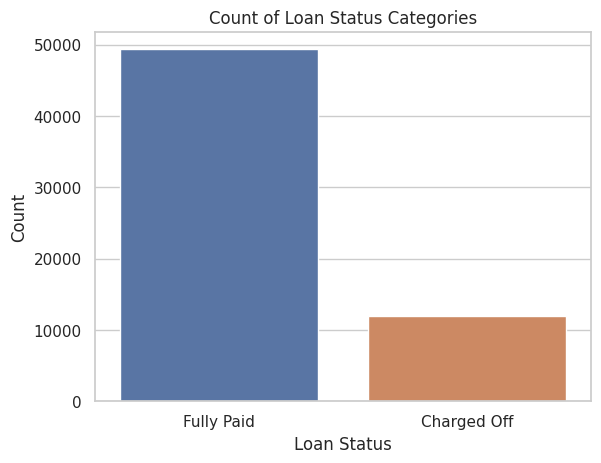

In [10]:
# Your codes here.
sns.countplot(x='loan_status', data=loan_data, order=['Fully Paid', 'Charged Off'])
plt.title('Count of Loan Status Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

**Answer**: This data has significantly more data points for non-defaulted customers vs those who defaulted so this dataset is not balanced.

+ Are there any highly correlated variables? ( **Hint**: You may consider using sns.heatmap() method)

<Axes: >

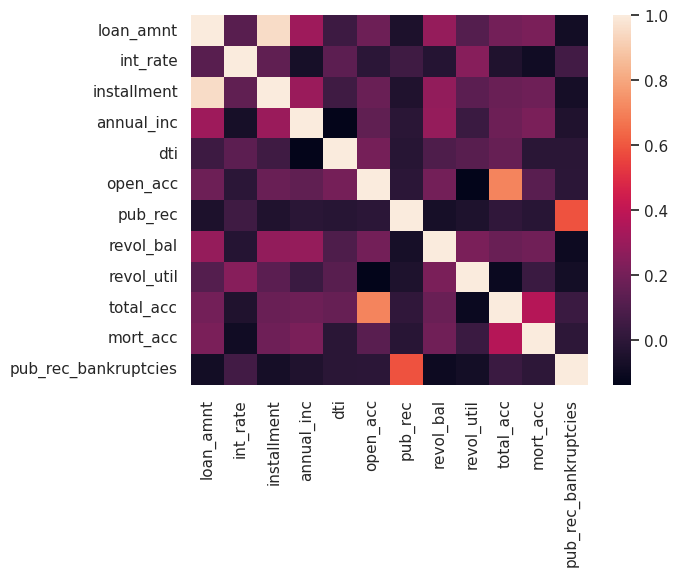

In [11]:
loan_data_num = loan_data.select_dtypes(include=np.number).drop(columns = 'index')
loan_data_corr = loan_data_num.corr()
sns.heatmap(loan_data_corr)

The listed amount of the loan applied for by the borrower and the installment they owe are incredibly highly correlated. Additionally, the number of open credit lines in the borrower’s credit file and The total number of credit lines currently in the borrower’s credit file are very highly correlated. Lastly, the number of derogatory public records and the number of public record bankruptcies are quite highly correlated.


+ Complete EDA.Get_text_visualize() function in EDA.py and then run the following cell. Which jobs have higher default rate?

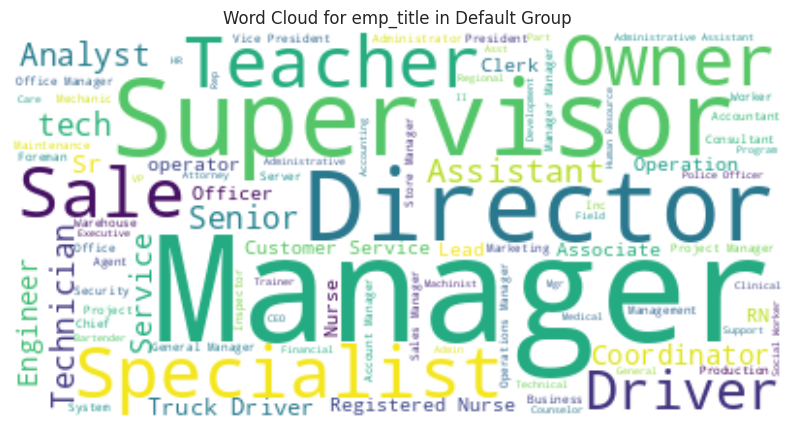

In [12]:
EDA.Get_text_visualize(loan_data,'emp_title','loan_status')

**Answer**: Directors, Managers, and Supervisors tend to have the highest default rates

 + What pattern can you find in loan grade and loan status?( **Hint**: You may consider using EDA.Get_category_visualize() method )

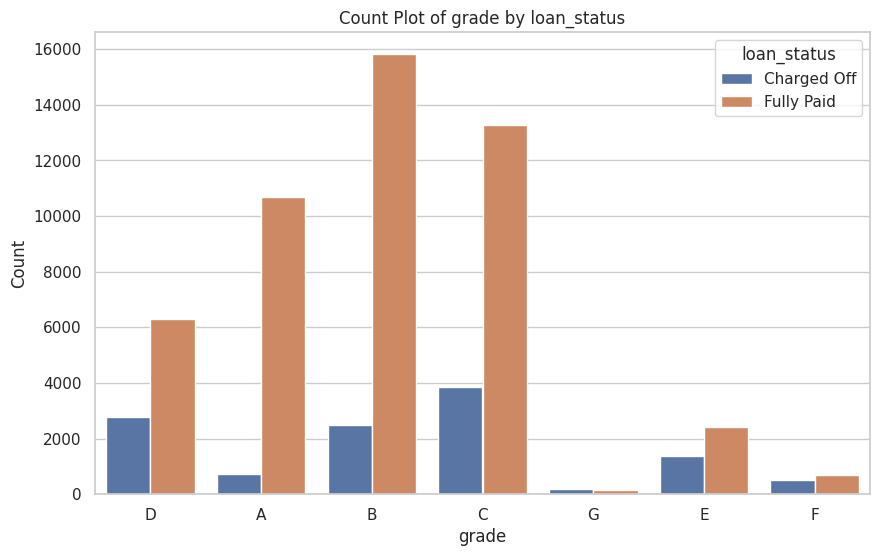

In [13]:
# Your codes here.
EDA.Get_category_visualize(loan_data,'grade','loan_status')

**Answer**: The proportion of fully paid compared to total loans is directly proportional to the grade. The higher grades have significantly higher percentage of fully paid off loans compared to grades E F & G that are <50% indicating that the high grade is a good indicator if the the customer will default.

+ Which year has the highest issued total loan amount?( **Hint**: You may consider using loan_data.groupby('column name')['column name'].sum().plot())

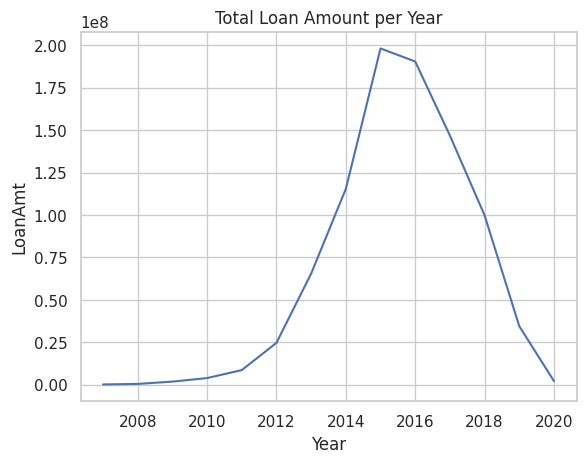

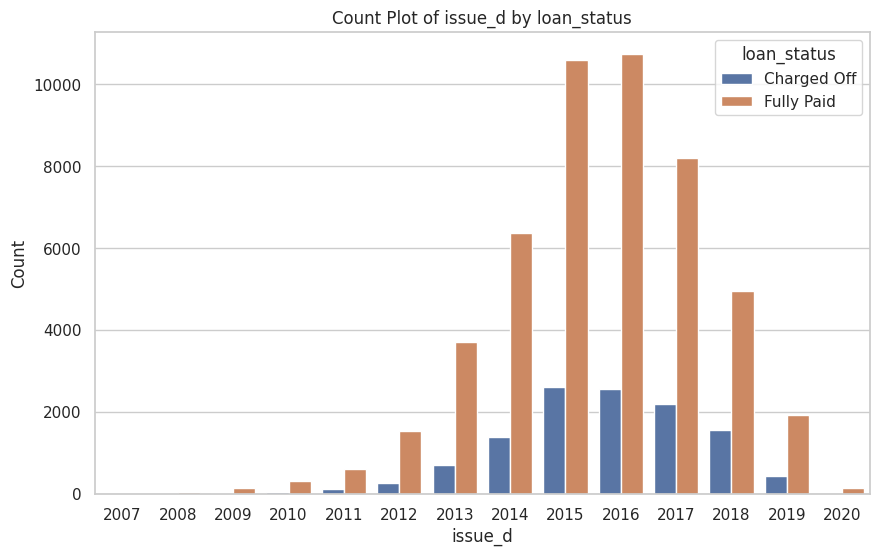

In [14]:
# Data preprocessing, change month-year to year.
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: int(x[-4:]))
# Your codes here.
loan_data.groupby('issue_d')['loan_amnt'].sum().plot(title = "Total Loan Amount per Year", xlabel="Year", ylabel="LoanAmt")
EDA.Get_category_visualize(loan_data,'issue_d','loan_status')

**Answer**: 2015 had the highest year amount

+ Is interest rate a good indicator for loan default?( **Hint**: You may consider using EDA.Get_numeric_visualize())

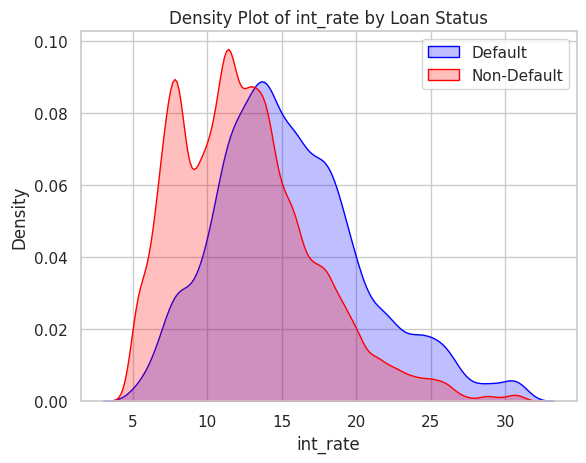

In [15]:
# Your codes here.
EDA.Get_numeric_visualize(df=loan_data,x='int_rate',y='loan_status')

**Answer**: No the interest rate is not a good indicator because both default and non-default loans behave similarly in relation to the interest rate.

### Part 2: Data Cleaning

2. Here we offer you an example how we do the cleaning procedure on each variable. You can have your own cleaning procedure.

In [16]:
# Missing values
# Look at the percentage of missing values for each variable
loan_data.isna().sum(axis = 0)/ loan_data.shape[0] * 100

index                   0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               7.135043
emp_length              6.338270
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.183731
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.591147
pub_rec_bankruptcies    0.042451
loan_status             0.001633
dtype: float64

In [17]:
# Emp_title, Title have too many categories, not suitable for construct dummy variable
# Delete these two variabls
print(len(loan_data.emp_title.unique()))
print(len(loan_data.title.unique()))

loan_data.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

27878
3374


In [18]:
# Change term value from categorical to numerical value
term_values = {' 36 months': 36, ' 60 months': 60}
loan_data['term'] = loan_data.term.map(term_values)

In [19]:
# Change employment length from categorical into numerical value
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
loan_data['emp_length'] = loan_data.emp_length.map(emp_length_values)

In [20]:
# Varriable grade offers the same information as sub_grade
loan_data.drop(columns = ['grade'], inplace = True)

In [21]:
# Zip code offers the same information as addr_state
loan_data.drop(columns = ['zip_code'], inplace = True)

In [22]:
# Get dummy variable, be careful with the colinearity
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
loan_data = pd.get_dummies(loan_data, columns=dummy_col, drop_first=True)

In [23]:
# Issue_d has the data leakage problem, wa can't get access to the issuance date until we know its true loan_status
loan_data.drop('issue_d', axis=1, inplace=True)

In [24]:
# Care about year information, not month
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.apply(lambda x: int(x[-4:]))

In [25]:
# For variable mort_acc, fill the missing value with median
loan_data.mort_acc.fillna(loan_data.mort_acc.median(), inplace = True)

In [26]:
# Drop the other missing values
loan_data.dropna(inplace = True)

In [27]:
# Change predicted value into binary numerical value 0,1
status_values = {'Fully Paid': 0, 'Charged Off': 1}
loan_data['loan_status'] = loan_data.loan_status.map(status_values)

### Part 3: Logistic Regression

In [28]:
y = loan_data.loan_status
X = loan_data.drop(['loan_status','int_rate'],axis = 1) # use this line if you have already dropped grade and sub_grade

Please finish the codes in Logistic_regression.py and then run the following cell.

In [29]:
# Choose the features that you think are important to predict loan_status
X_var = ['loan_amnt','revol_util','annual_inc','pub_rec_bankruptcies']
X = X[X_var]

In [30]:
# Perform the logistic regression
from Logistic_regression import Logistic_regression
p_value, result = Logistic_regression(X,y)

Optimization terminated successfully.
         Current function value: 0.478318
         Iterations 6


To evaluate the performance of your model, we use a separate dataset. Again, you should first clean this dataset similar to Part 2.

In [31]:
### Data cleaning

# Perform data cleaning based on your EDA result
import numpy as np
import pandas as pd

def Data_cleaning(X):
    '''
       Perform Data cleaning procedure based on EDA result.
       (This code should match your EDA result.)

       Input:
       X       : Raw data

       Output:
       X       : Cleaned Data
    '''
    dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
                 'application_type', 'home_ownership', 'addr_state']

    emp_length_values = {'< 1 year': 0,
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}

    term_values = {' 36 months': 36, ' 60 months': 60}

    X['int_rate'] = X.int_rate.apply(lambda x: float(x[:-1]))
    X['revol_util'] = X.revol_util.apply(lambda x: str(x)[:-1])
    X['revol_util'] = X.revol_util.replace('na','0')
    X['revol_util'] = X.revol_util.astype(np.float64)
    X.drop(columns = ['emp_title','title','int_rate'],axis = 1, inplace=True)
    X['mort_acc'].fillna(X.mort_acc.median(), inplace = True)
    X['term'] = X.term.map(term_values)
    X.drop(columns = ['grade','zip_code'], inplace = True)
    X= pd.get_dummies(X, columns=dummy_col, drop_first=True)
    X.drop('issue_d', axis=1, inplace=True)
    X['earliest_cr_line'] = X.earliest_cr_line.apply(lambda x: str(x[-4:]))
    X['earliest_cr_line'] = X.earliest_cr_line.astype(int)
    X['emp_length'] = X.emp_length.map(emp_length_values)
    X.fillna(X.median(), inplace = True)
    return X


You may notice, for the test data, you don't have access to the true label. 

In [32]:
X_test = pd.read_csv('%s/loan_test.csv'%(_DATA_DIR), index_col = 0)
# Choose the features that you think are important to predict loan_status
X_test = Data_cleaning(X_test)


TypeError: 'float' object is not subscriptable

In [ ]:
X_test = X_test[X_var]
X_test.reset_index(inplace = True, drop = True)

In [ ]:
# OOS prediction
y_pred = result.predict(X_test)
y_pred = y_pred.apply(lambda x: int(x+0.5))

In [ ]:
# True value
y_true =  pd.read_csv('%s/true_value.csv'%(_DATA_DIR), index_col =0)
y_true['loan_status'] = y_true.loan_status.map(status_values)

# OOS prediction MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)   
print('MSE: %.3f' % mse)

# OOS prediction log-loss
from sklearn.metrics import log_loss
logloss = log_loss(y_true, y_pred)
print('Logloss: %.3f' % logloss)